# ***PROJECT-B3TA***
## **notebook 02 | Import Sound Profiles and Join to Main Dataset(s)**  

---

#### Imports.

In [1]:
import numpy as np
import pandas as pd
print(f"Numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
pio.renderers.default = 'notebook'

# sklearn
import sklearn as sk
from sklearn.metrics.pairwise import cosine_similarity
print(f"skLearn version: {sk.__version__}")

# scipy
import scipy
from scipy.stats import norm

# statsmodels
import statsmodels.api as sm

# other
import json

# b3ta functions
import b3tafunc as b3


Numpy version: 1.24.3
pandas version: 2.0.3
skLearn version: 0.24.2


### 0. **Background**
- Having conducted an first pass of cleaning and basic eda we now need to join our sound profiles we accessed via the API to our main dataset.
- Given the size of the dataset we will also create a smaller version from a 20% sample to reduce impact on CPU whilst conducting more indepth EDA, modelling and recommendation engine building.

**Data Dictionary** (following initial clean and eda)

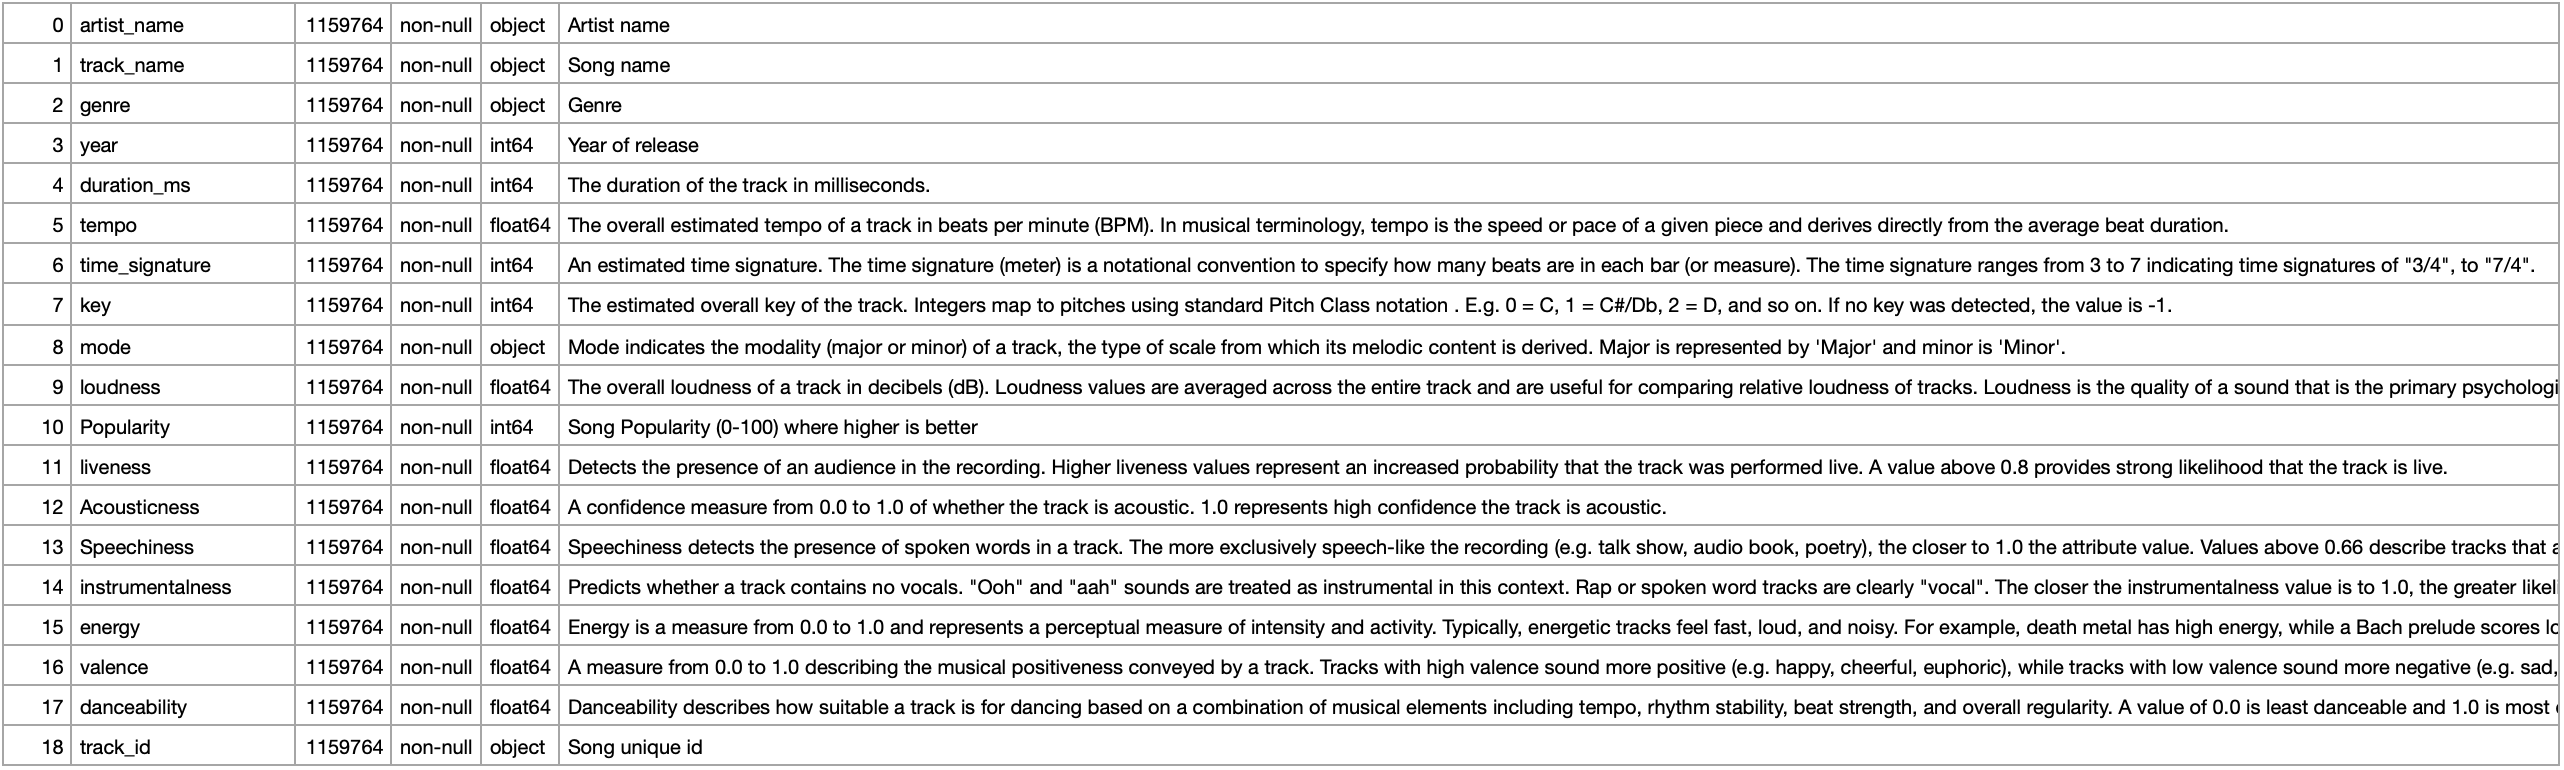

### 1. **Dataset Loading**

#### Load main dataset.

In [2]:
# Read in spotify dataset
df = pd.read_csv('../data/01-b3-exports/01-b3_df.csv', index_col=0)
df.head(3)

,artist_name,track_name,genre,duration_ms,tempo,key,mode,loudness,liveness,acousticness,speechiness,instrumentalness,energy,valence,danceability,track_id
0,Jason Mraz,I Won't Give Up,acoustic,240166,133.406,4,1,-10.058,0.1150,0.694,0.0429,0.000000,0.303,0.139,0.483,53QF56cjZA9RTuuMZDrSA6
1,Jason Mraz,93 Million Miles,acoustic,216387,140.182,3,1,-10.286,0.0974,0.477,0.0258,0.000014,0.454,0.515,0.572,1s8tP3jP4GZcyHDsjvw218
2,Joshua Hyslop,Do Not Let Me Go,acoustic,158960,139.832,3,1,-13.711,0.0895,0.338,0.0323,0.000050,0.234,0.145,0.409,7BRCa8MPiyuvr2VU3O9W0F


#### <<< ***See 00-b3-spotify-api-access.ipynb for code accessing the data that will act as our sound profiles in addition to our manually selected London profile from the previous notebook 01-b3-loading-cleaning-initial-eda.ipynb*** >>>

### 2. **Importing our sound profiles**

In [3]:
london_snd = pd.read_csv('../data/b3_sp_v2_london.csv')
manchester_snd = pd.read_csv("../data/b3_sp_v2_manchester.csv")
nyc_snd = pd.read_csv("../data/b3_sp_v2_nyc.csv")
la_snd = pd.read_csv("../data/b3_sp_v2_la.csv")
ibiza_snd = pd.read_csv("../data/b3_sp_v1_ibiza.csv")
berlin_snd = pd.read_csv("../data/b3_sp_v1_berlin.csv")
kingston_sound = pd.read_csv("../data/b3_sp_v1_kingston.csv")

### 3. **Cleaning our sound profiles**
- Conduct basic sound profile checks and cleaning
- DF recap;
    - df
    - london_snd, manchester_snd, nyc_snd, la_snd, ibiza_snd, berlin_snd, kingston_sound

#### Check shapes.

In [4]:
sp_list = [london_snd, manchester_snd, nyc_snd, la_snd, ibiza_snd, berlin_snd, kingston_sound]
sp_names_list = ['london_snd', 'manchester_snd', 'nyc_snd', 'la_snd', 'ibiza_snd', 'berlin_snd', 'kingston_sound']

for sp, sp_name in zip(sp_list, sp_names_list):
    print(f"{sp_name} shape: {sp.shape}")

london_snd shape: (304, 17)
manchester_snd shape: (234, 17)
nyc_snd shape: (226, 17)
la_snd shape: (391, 17)
ibiza_snd shape: (482, 17)
berlin_snd shape: (219, 17)
kingston_sound shape: (76, 17)


#### Check duplicates.
- London = 4
- NYC = 5
- Berlin = 2

In [5]:
for sp, sp_name in zip(sp_list, sp_names_list):
    print(f"{sp_name} duplicates:\n{sp.duplicated().value_counts()}\n---")

london_snd duplicates:
False    300
True       4
Name: count, dtype: int64
---
manchester_snd duplicates:
False    234
Name: count, dtype: int64
---
nyc_snd duplicates:
False    221
True       5
Name: count, dtype: int64
---
la_snd duplicates:
False    391
Name: count, dtype: int64
---
ibiza_snd duplicates:
False    482
Name: count, dtype: int64
---
berlin_snd duplicates:
False    217
True       2
Name: count, dtype: int64
---
kingston_sound duplicates:
False    76
Name: count, dtype: int64
---


#### Drop duplicates.

In [6]:
# Drop duplicates
sp_dupe_names_list = ['london_snd', 'nyc_snd', 'berlin_snd']
sp_dupe_list = [london_snd, nyc_snd, berlin_snd]

b3.DROP_DUPLICATES(sp_dupe_list, sp_dupe_names_list)

london_snd duplicates:
False    300
Name: count, dtype: int64
---
nyc_snd duplicates:
False    221
Name: count, dtype: int64
---
berlin_snd duplicates:
False    217
Name: count, dtype: int64
---


#### Check NaNs.

In [7]:
for sp, sp_name in zip(sp_list, sp_names_list):
    print(f"{sp_name} NaNs: {sp.isna().sum().sum()}")

london_snd NaNs: 0
manchester_snd NaNs: 0
nyc_snd NaNs: 0
la_snd NaNs: 0
ibiza_snd NaNs: 0
berlin_snd NaNs: 0
kingston_sound NaNs: 0


#### Join sound profiles.

Count total number of tracks combined.

In [8]:
# Create list of sound profiles
sp_list = [london_snd, manchester_snd, nyc_snd, la_snd, ibiza_snd, berlin_snd, kingston_sound]

# Count total tracks in sound profiles combined
sum(sp.shape[0] for sp in sp_list)

1921

Combine.

In [9]:
# Combine sound profiles
combined_snd = pd.concat(sp_list, ignore_index=True)

#### Check and drop duplicates.
- Ibiza = 13

Check duplicates.

In [10]:
# Check duplicates
combined_snd['track_id'].duplicated().sum()

13

Filter and drop duplicates (combined and ibiza sound proiles).

In [11]:
# Get ibiza indices to drop
dupe_filter = combined_snd['track_id'].duplicated(keep=False)
sp_unknown_filter = combined_snd['sound_profile'] == 'ibiza'
ibiza_dupe_indices = ibiza_snd[ibiza_snd['track_id'].isin(list(combined_snd[dupe_filter & sp_unknown_filter]['track_id']))].index

# Drop combined duplicates
b3.DROP_DUPLICATES([combined_snd], ['combined_snd'], 'ibiza')

# Drop duplicates from ibiza_snd
ibiza_snd.drop(index=ibiza_dupe_indices, inplace=True)

# Print duplicated value counts
print(f"Ibiza sound duplicates:\n{ibiza_snd.duplicated().value_counts()}")
print("---")

combined_snd duplicates:
False    1908
Name: count, dtype: int64
---
Ibiza sound duplicates:
False    469
Name: count, dtype: int64
---


Check total number of tracks combined. (1925 - 13 = 1912)

In [12]:
# Check total number of tracks combined (individual sps)
print(f"Individual sps combined: {sum(sp.shape[0] for sp in sp_list)}")

# Check total number of tracks combined (combined sps)
print(f"Combined sp: {combined_snd.shape[0]}")

Individual sps combined: 1908
Combined sp: 1908


#### Get track ids.

In [13]:
# Update lists of sound profile names and corresponding dataframes
sp_list = [london_snd, manchester_snd, nyc_snd, la_snd, ibiza_snd, berlin_snd, kingston_sound, combined_snd]
sp_names_list = ['london_snd', 'manchester_snd', 'nyc_snd', 'la_snd', 'ibiza_snd', 'berlin_snd', 'kingston_sound', 'combined_snd']

# Create a dictionary mapping sound profile names to their track IDs
sp_trackid_dict = {f"{sp_name}_trackids": list(sp["track_id"]) for sp, sp_name in zip(sp_list, sp_names_list)}

Check correct number track_ids per sp. Correct - Ibiza now down by 13 from 482 to 469 after removal of duplicates.

In [14]:
# Check correct number track_ids per sp. 
for sp in list(sp_trackid_dict.keys()):
    print(f"{sp} count : {len(sp_trackid_dict[sp])}")

london_snd_trackids count : 300
manchester_snd_trackids count : 234
nyc_snd_trackids count : 221
la_snd_trackids count : 391
ibiza_snd_trackids count : 469
berlin_snd_trackids count : 217
kingston_sound_trackids count : 76
combined_snd_trackids count : 1908


### 4. **Joining sound profiles to create master DataFrames**
- **2x versions to be created**;
    - full (1million tracks)
    - a 50% sample (580k)
- Given size of dataset and number of cols we could be working with (if we encode genres for example) we're going to create a smaller version of the dataset based on a random 20% sample to speed up our workflow during experimentation.

#### Add sound_profile column to df

In [15]:
# Add sound_profile column to main df
df['sound_profile'] = 'unknown'

#### Create 50% sample of dataset.

In [16]:
# Take 50% sample
df50 = df.sample(frac=0.5, random_state=12345)
df50.shape

(579874, 17)

In [17]:
sp_list = [london_snd, manchester_snd, nyc_snd, la_snd, ibiza_snd, berlin_snd, kingston_sound]
sp_names_list = ['london_snd', 'manchester_snd', 'nyc_snd', 'la_snd', 'ibiza_snd', 'berlin_snd', 'kingston_sound']

for sp, sp_name in zip(sp_list, sp_names_list):
    print(f"{sp_name} shape: {sp.shape}")

london_snd shape: (300, 17)
manchester_snd shape: (234, 17)
nyc_snd shape: (221, 17)
la_snd shape: (391, 17)
ibiza_snd shape: (469, 17)
berlin_snd shape: (217, 17)
kingston_sound shape: (76, 17)


In [18]:
combined_snd['sound_profile'].value_counts()

sound_profile
ibiza         469
la            391
london        300
manchester    234
nyc           221
berlin        217
kingston       76
Name: count, dtype: int64

#### Comp sound profiles onto main dfs.

In [19]:
# Join sound profiles to main df
df = pd.concat([combined_snd, df], ignore_index=True)
df50 = pd.concat([combined_snd, df50], ignore_index=True)
# Check shape
print(f"df shape: {df.shape}")
print(f"df50 shape: {df50.shape}")

df shape: (1161656, 17)
df50 shape: (581782, 17)


#### Check duplicates and drop.

In [20]:
# Check sound profile counts (we don't want to drop the labelled duplicates)
df['sound_profile'].value_counts()

sound_profile
unknown       1159748
ibiza             469
la                391
london            300
manchester        234
nyc               221
berlin            217
kingston           76
Name: count, dtype: int64

In [21]:
# Check duplicates for each df
print(f"df duplicates: {df['track_id'].duplicated().value_counts()}")
print(f"df50 duplicates: {df50['track_id'].duplicated().value_counts()}")

df duplicates: track_id
False    1161199
True         457
Name: count, dtype: int64
df50 duplicates: track_id
False    581566
True        216
Name: count, dtype: int64


In [22]:
# Drop duplicates
b3.DROP_DUPLICATES([df, df50], ['df', 'df50'], 'unknown')

df duplicates:
False    1161199
Name: count, dtype: int64
---
df50 duplicates:
False    581566
Name: count, dtype: int64
---


In [23]:
# Check sound profile counts - as above, no labelled tracks dropped
df['sound_profile'].value_counts()

sound_profile
unknown       1159291
ibiza             469
la                391
london            300
manchester        234
nyc               221
berlin            217
kingston           76
Name: count, dtype: int64

#### Check NaNs.

In [24]:
# Check NaNs for each df
print(f"df NaNS: {df.isna().sum().sum()}")
print(f"df50 NaNs: {df50.isna().sum().sum()}")

df NaNS: 0
df50 NaNs: 0


#### Reset indices following joins.

In [25]:
df.reset_index(inplace=True, drop=True)
df50.reset_index(inplace=True, drop=True)

### ***SUMMARY OF WORK TO DATE...***
- In this notebook we have imported our seperate sound profiles, cleaned and joined to our main dataframe to create a master adding a column to define which sound profile tracks belong to if any.
- We created a 50% sample version of the dataset to ease CPU load and allow for streamlit upload.
- We have also recreated these sound_profiles as dictionary of track_id lists allowing for easy access irrespective of the df being used.
- Now we have our data all together, **next steps** with will include;
    - In depth analysis and comparision of each individual sound profile
    - Further cleaning and preprocessing with an eye on future modelling

*For reference, key components referenced in the project so far are listed below;*
- **df** (1161135 tracks, 17 rows) - our main DataFrame, now with sound profiles joined and duplicates removed.
- **df50** (581499 tracks, 17 rows) - our 50% sample of our main DataFrame, now with sound profiles joined and duplicates removed.
- **sp_trackid_dict** - a dictionary of track_id lists, one for each sound profile plus all shound profiles combined. (See .keys())
- **sp_list** - a list containing dataframes relating to each sound profile inc. combined.
    - **sp dataframes; london_snd, manchester_snd, nyc_snd, la_snd, ibiza_snd, berlin_snd, kingston_sound, combined_snd** - individual dataframes for each sound profile.
- **sp_names_list** - a list containing strings relating to each sound profile name inc. combined.
    - **sp names list; 'london_snd', 'manchester_snd', 'nyc_snd', 'la_snd', 'ibiza_snd', 'berlin_snd', 'kingston_sound', 'combined_snd'** - individual dataframes for each sound profile.

Let's export our master dfs and track_id dict then complete the next stage of analysis and pre-processing in another notebook...

#### Exports.

In [26]:
# Full df
df.to_csv('../data/02-b3-exports/02-b3_df.csv')

# 50% sample
df50.to_csv('../data/02-b3-exports/02-b3_df50.csv')

# sp_trackid_dict as json
with open('../data/02-b3-exports/sp_trackid_dict.json', 'w') as f:
    json.dump(sp_trackid_dict, f)

## /// ***APPENDIX*** ///